# **DETECCION DE EMOCIONES EN BASE A GESTOS FACIALES**

#### Comentario:
* Este bloque de código importa las bibliotecas necesarias para análisis de datos, visualización, 
* modelado de redes neuronales y evaluación de modelos. 
* También incluye utilidades para el manejo de archivos y control de advertencias.

In [ ]:
pip install tensorflow

In [24]:
# Importación de bibliotecas para análisis de datos y visualización
import pandas as pd  # Manejo de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Visualización de datos
import seaborn as sns  # Visualización de datos avanzada
import plotly.express as px  # Visualización interactiva de datos

# Importación de TensorFlow y Keras para el modelado de redes neuronales
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generación de datos de imágenes
from tensorflow.keras.utils import to_categorical  # Conversión de etiquetas a formato categórico
from tensorflow.keras.preprocessing.image import load_img  # Cargar imágenes
import os  # Operaciones del sistema operativo
import random  # Generación de números aleatorios

# Importación de herramientas de scikit-learn para evaluación de modelos
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de evaluación
from sklearn.preprocessing import LabelBinarizer  # Binarización de etiquetas
from sklearn.metrics import roc_curve, auc, roc_auc_score  # Curvas ROC y puntuación AUC

# Herramientas adicionales para IPython y manejo de advertencias
from IPython.display import clear_output  # Limpieza de la salida de IPython
import warnings  # Manejo de advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias

#### Comentario:
* Este bloque define las rutas de los datos y los parámetros para la configuración del modelo.
* `SEED` se utiliza para garantizar que los resultados sean reproducibles.
* `IMG_HEIGHT` y `IMG_WIDTH` definen las dimensiones a las que se redimensionarán las imágenes.
* `BATCH_SIZE` define el número de imágenes procesadas en cada lote durante el entrenamiento.
* `CLASS_LABELS` es una lista con las etiquetas de las emociones a detectar.

In [25]:
# Definición de rutas para los datos de entrenamiento y prueba
train_ruta = r"C:\Users\Operador\Desktop\Maestria\Redes\test"
test_ruta = r"C:\Users\Operador\Desktop\Maestria\Redes\train"

# Definición de constantes para la configuración del modelo
SEED = 12  # Semilla para asegurar reproducibilidad
IMG_HEIGHT = 48  # Altura de las imágenes de entrada
IMG_WIDTH = 48  # Anchura de las imágenes de entrada
BATCH_SIZE = 64  # Tamaño del lote para la generación de datos
CLASS_LABELS = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', "surprised"]  # Etiquetas de las clases

#### Comentario:
* Este bloque de código crea generadores de datos para las imágenes de entrenamiento y prueba.
* Los generadores reescalan los valores de los píxeles de las imágenes para que estén entre 0 y 1.
* `flow_from_directory` permite cargar imágenes directamente desde las carpetas especificadas.
* `target_size` asegura que todas las imágenes tengan el mismo tamaño.
* `batch_size` define el número de imágenes procesadas en cada lote.
* `class_mode='categorical'` indica que las etiquetas de clase son categóricas.
* `classes` especifica el orden de las clases según `CLASS_LABELS`.
* `seed` asegura que las operaciones aleatorias sean reproducibles.

In [26]:
# Importar ImageDataGenerator de Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos con reescalado
# Rescale para normalizar los valores de los píxeles entre 0 y 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Configuración del generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_ruta,  # Ruta de los datos de entrenamiento
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensionar imágenes
    batch_size=BATCH_SIZE,  # Tamaño del lote
    class_mode='categorical',  # Modo de clasificación categórica
    classes=CLASS_LABELS,  # Etiquetas de las clases
    seed=SEED  # Semilla para reproducibilidad
)

# Configuración del generador de datos de prueba
test_generator = test_datagen.flow_from_directory(
    test_ruta,  # Ruta de los datos de prueba
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensionar imágenes
    batch_size=BATCH_SIZE,  # Tamaño del lote
    class_mode='categorical',  # Modo de clasificación categórica
    classes=CLASS_LABELS,  # Etiquetas de las clases
    seed=SEED  # Semilla para reproducibilidad
)

Found 7178 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


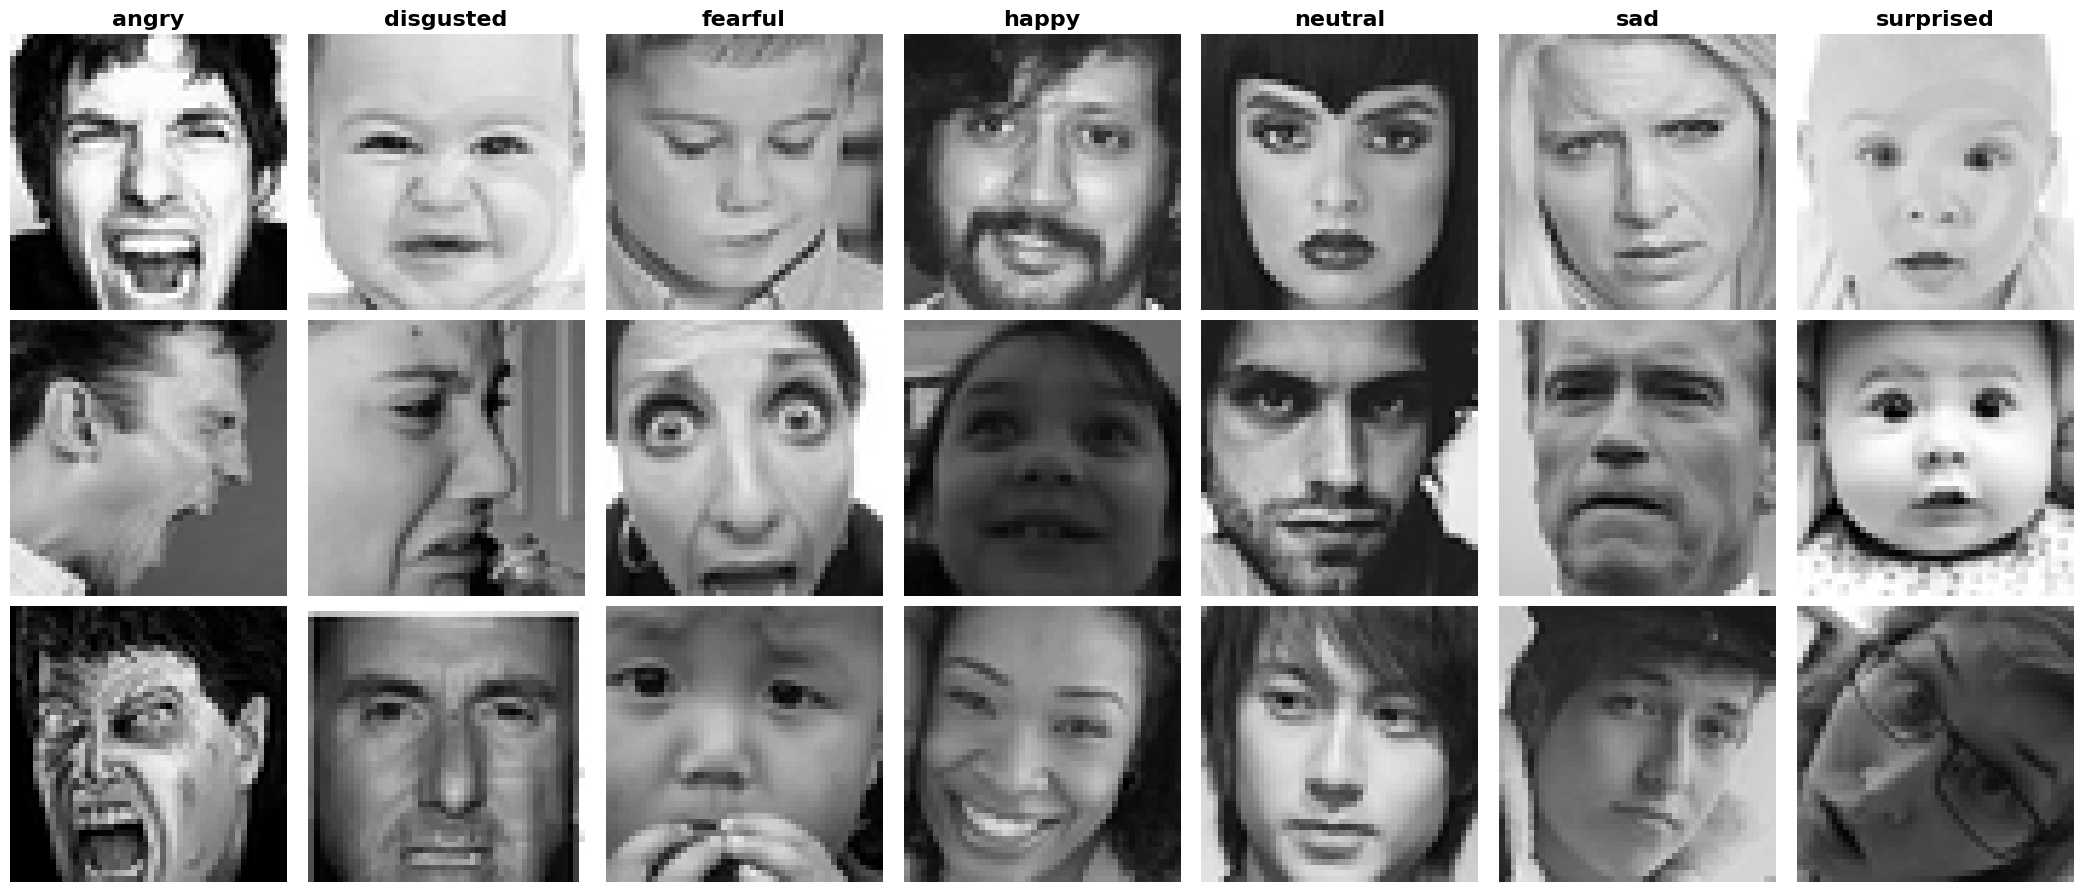

In [27]:
def show_images_from_folders_in_column_grid(folder_path, img_width, img_height, num_images=3):
    """
    Muestra un número específico de imágenes al azar de cada subcarpeta dentro de la carpeta proporcionada en una rejilla,
    con cada clase en su propia columna.

    Args:
    folder_path (str): Ruta de la carpeta que contiene subcarpetas de clases.
    img_width (int): Ancho de las imágenes a mostrar.
    img_height (int): Altura de las imágenes a mostrar.
    num_images (int): Número de imágenes a mostrar por clase.
    """
    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]  # Filtrar solo directorios
    total_classes = len(class_folders)
    cols = total_classes  # Número de columnas en la rejilla igual al número de clases
    rows = num_images  # Número de filas en la rejilla igual al número de imágenes por clase

    plt.figure(figsize=(cols * 3, rows * 3))  # Ajustar el tamaño de la figura para la rejilla

    for class_index, class_name in enumerate(class_folders):
        class_folder_path = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_folder_path)
        
        # Elegir un número específico de imágenes al azar de la carpeta de la clase
        sample_images = random.sample(image_files, min(num_images, len(image_files)))
        
        for image_index, image_name in enumerate(sample_images):
            img_path = os.path.join(class_folder_path, image_name)
            img = load_img(img_path, target_size=(img_width, img_height))
            
            # Mostrar la imagen en el subplot correspondiente
            plt.subplot(rows, cols, class_index + image_index * cols + 1)
            plt.imshow(img)
            if image_index == 0:
                plt.title(class_name, fontsize=16, fontweight='bold')  # Título grande y en negrita
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar ejemplos de imágenes del conjunto de entrenamiento
show_images_from_folders_in_column_grid(train_ruta, IMG_WIDTH, IMG_HEIGHT, num_images=3)

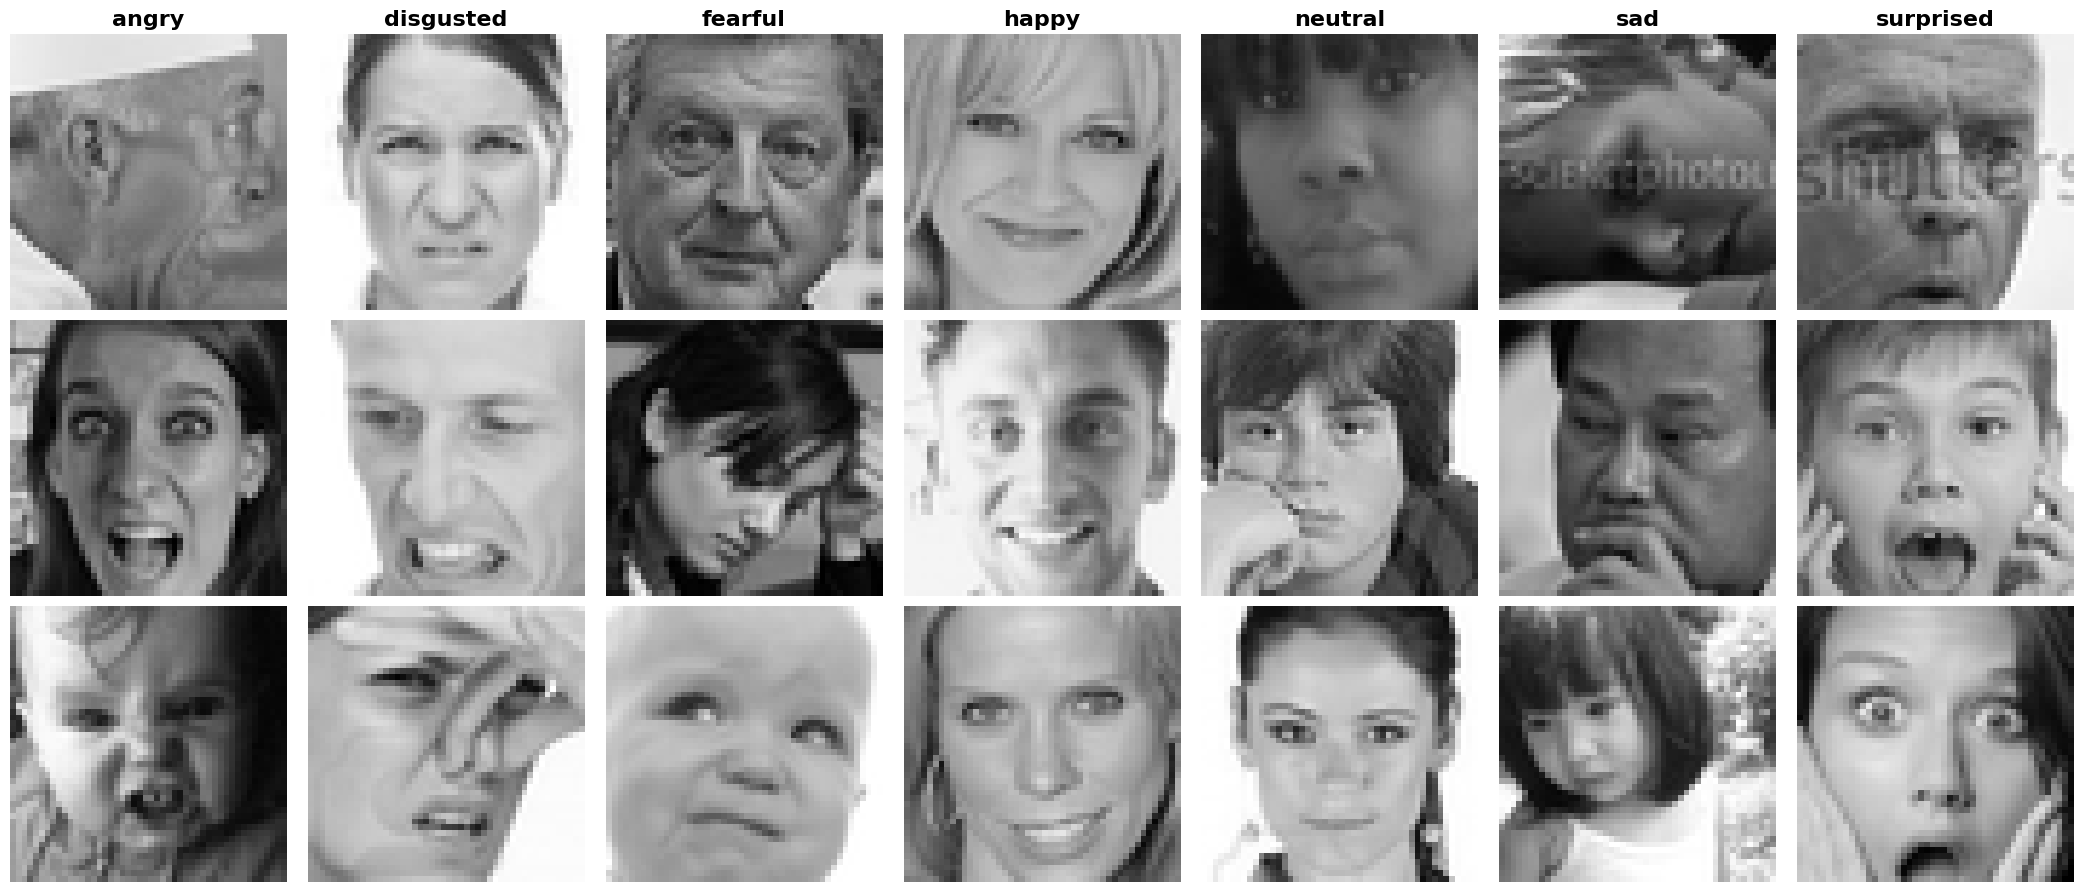

In [28]:
# Mostrar ejemplos de imágenes del conjunto de testeo
show_images_from_folders_in_column_grid(test_ruta, IMG_WIDTH, IMG_HEIGHT, num_images=3)

In [29]:
def count_images_in_folders(folder_path):
    """
    Cuenta el número de imágenes en cada subcarpeta dentro de la carpeta principal.

    Args:
    folder_path (str): Ruta de la carpeta principal que contiene subcarpetas de clases.

    Returns:
    dict: Diccionario con el conteo de imágenes por clase.
    int: Número total de imágenes en todas las clases.
    """
    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]  # Filtrar solo directorios
    class_counts = {}
    total_images = 0

    for class_name in class_folders:
        class_folder_path = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_folder_path)
        num_images = len(image_files)
        class_counts[class_name] = num_images
        total_images += num_images

    return class_counts, total_images

def plot_class_distribution_with_trendline(class_counts):
    """
    Grafica la distribución de imágenes por clase con una línea de tendencia.

    Args:
    class_counts (dict): Diccionario con el conteo de imágenes por clase.
    """
    # Ordenar las clases por el número de imágenes de mayor a menor
    sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
    classes = list(sorted_class_counts.keys())
    counts = list(sorted_class_counts.values())
    total_images = sum(counts)

    # Crear una paleta de colores única para cada barra
    palette = sns.color_palette('husl', len(classes))

    plt.figure(figsize=(20, 8))
    bars = plt.bar(classes, counts, color=palette)
    plt.xlabel('Clases')
    plt.ylabel('Número de imágenes')
    plt.title('Distribución de imágenes por clase en el conjunto de datos de entrenamiento')
    plt.xticks(rotation=45)

    # Añadir etiquetas de datos en las barras con número de imágenes y porcentaje
    for bar in bars:
        yval = bar.get_height()
        percentage = (yval / total_images) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{int(yval)}\n({percentage:.1f}%)', ha='center', va='center')

    # Añadir línea de tendencia
    trend_x = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    trend_y = [bar.get_height() for bar in bars]
    plt.plot(trend_x, trend_y, color='black', marker='o', linestyle='dashed', linewidth=2, markersize=8)

    plt.show()

Total de imágenes en el conjunto de entrenamiento: 7178


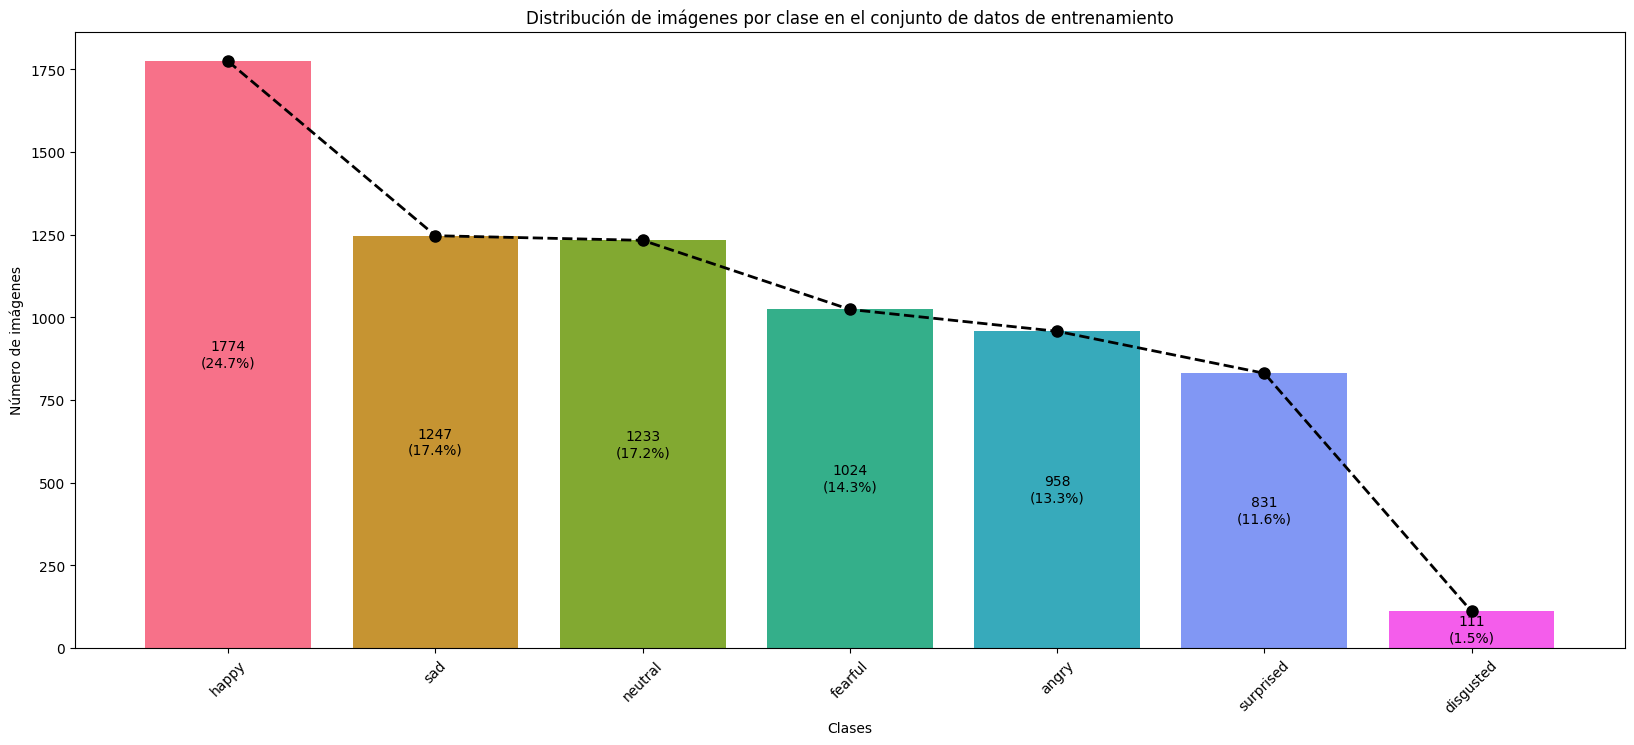

In [30]:
# Contar imágenes en cada carpeta de clase
class_counts, total_images = count_images_in_folders(train_ruta)

# Imprimir el número total de imágenes
print(f"Total de imágenes en el conjunto de entrenamiento: {total_images}")

# Graficar distribución de imágenes por clase con línea de tendencia
plot_class_distribution_with_trendline(class_counts)

Total de imágenes en el conjunto de testeo: 28709


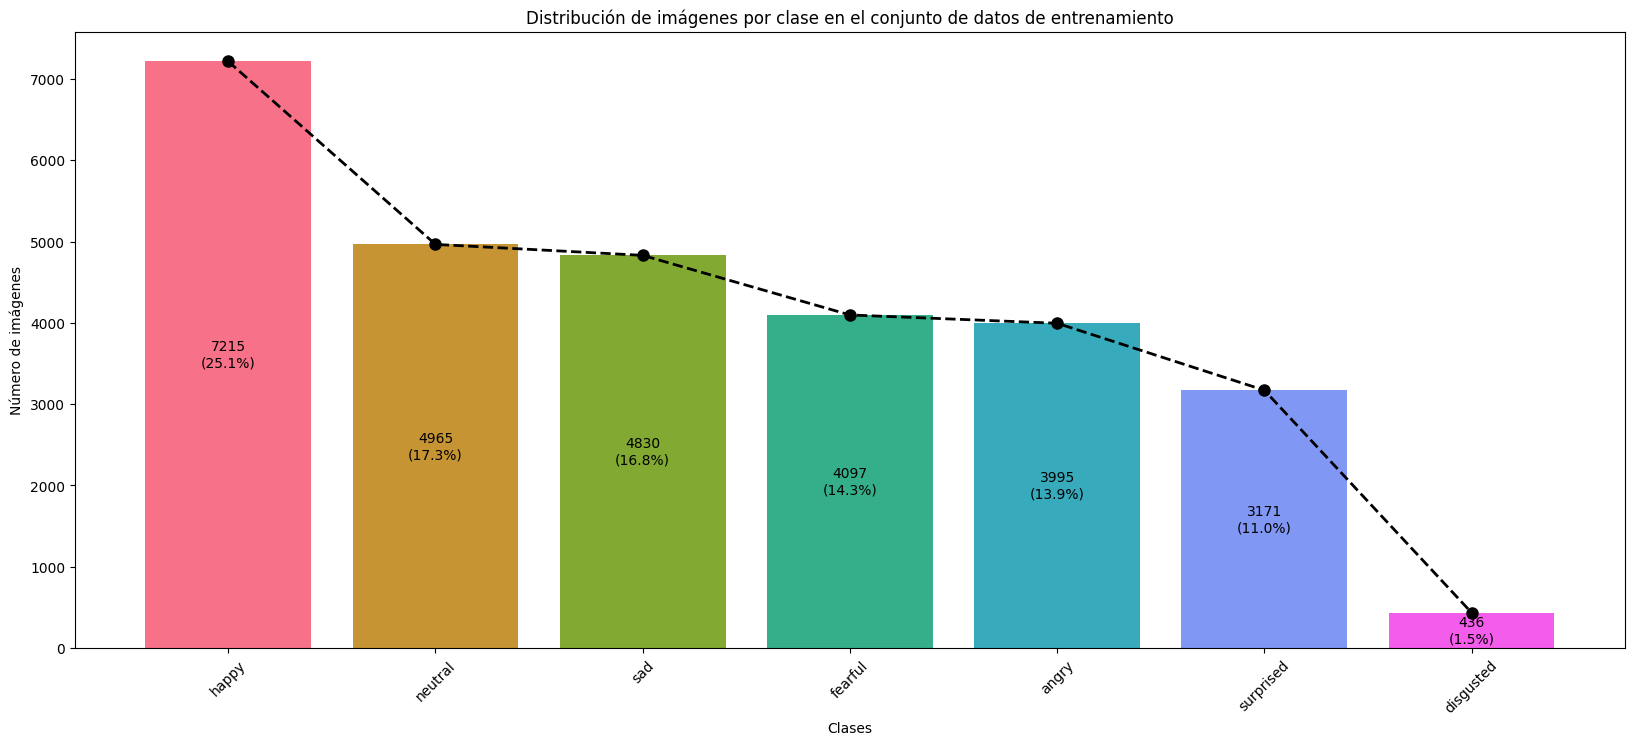

In [31]:
# Contar imágenes en cada carpeta de clase
class_counts_test, total_images_test = count_images_in_folders(test_ruta)

# Imprimir el número total de imágenes
print(f"Total de imágenes en el conjunto de testeo: {total_images_test}")

# Graficar distribución de imágenes por clase con línea de tendencia
plot_class_distribution_with_trendline(class_counts_test)

In [32]:
!pip install torch
!pip install torchvision
!pip install --upgrade torch torchvision


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
BATCH_SIZE = 64 # Establece el tamaño del lote en 64
# Importa torch
import torch
# Desde las utilerias de torch importa random_split
from torch.utils.data import random_split
# Desde las utilerias de torch importa DataLoader
from torch.utils.data import DataLoader
# Importar nn de torch
import torch.nn as nn
# Importar functional de torch y darle el alias F
import torch.nn.functional as F
# Desde los modelos de torchvision importar resnet50, resnet101, resnet18 y resnet34
from torchvision.models import resnet50, resnet101, resnet18, resnet34
# Importar OrderedDict desde collections
from collections import OrderedDict
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import torch.optim as optim
from torch.optim import SGD
from torchvision import datasets, transforms, models

In [34]:
class EmotionNet(nn.Module):
    def __init__(self, net, n_classes):
        super(EmotionNet, self).__init__()
        self.net = net
        self.n_features = self.net.fc.in_features
        self.net.fc = nn.Sequential(
            nn.Linear(self.n_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, n_classes)
        )

    def forward(self, x):
        return self.net(x)

# Cargar el modelo resnet50 preentrenado
net = resnet50(pretrained=True)
# Número de clases de salida (emociones)
n_classes = 1  # Suponiendo una salida binaria (por ejemplo, emoción presente o no)
model = EmotionNet(net, n_classes)

In [35]:
# Transformaciones / Normalizacion
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [36]:
# Cargar datos
train_dataset = datasets.ImageFolder(root=train_ruta, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=7)

test_dataset = datasets.ImageFolder(root=test_ruta, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=7)

# Definir la red preentrenada con los pesos del modelo Resnet50
net = models.resnet50(pretrained=True)
model = EmotionNet(net, len(CLASS_LABELS))

In [37]:
lr = 1e-4
momentum = 0.09
epochs = 10
# Definir el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [38]:
# Mover el modelo al dispositivo adecuado (CPU o GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

EmotionNet(
  (net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [39]:
# Resumen del modelo
def print_model_summary(model):
    def count_parameters(m):
        return sum(p.numel() for p in m.parameters() if p.requires_grad)
    
    print(f'{"Layer":<20} {"Output Shape":<25} {"Param #":<15}')
    print('='*60)
    total_params = 0
    for name, layer in model.named_children():
        output_shape = str(tuple(layer(torch.zeros(1, 3, IMG_HEIGHT, IMG_WIDTH)).size()))
        param_count = count_parameters(layer)
        total_params += param_count
        print(f'{name:<20} {output_shape:<25} {param_count:<15}')
    print('='*60)
    print(f'Total Parameters: {total_params}')

print_model_summary(model)

Layer                Output Shape              Param #        
net                  (1, 7)                    24560711       
Total Parameters: 24560711


In [40]:
# Función de entrenamiento para un batch
def train_batch(data, target, model, optimizer, criterion, device):
    model.train()
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    return loss.item()

In [41]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import random

def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    all_targets = []
    all_probs = []

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            probabilities = torch.nn.functional.softmax(output, dim=1)
            all_targets.extend(target.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy())

    accuracy = correct / len(data_loader.dataset)
    avg_loss = total_loss / len(data_loader)

    return avg_loss, accuracy, np.array(all_targets), np.array(all_probs)


In [42]:
def train_model(train_loader, test_loader, model, optimizer, criterion, device, epochs, class_labels):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            loss = train_batch(data, target, model, optimizer, criterion, device)
            train_loss += loss
        train_loss /= len(train_loader)

        test_loss, test_accuracy, all_targets, all_probs = evaluate(model, test_loader, criterion, device)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

        # Generate ROC curves for each class
        plt.figure(figsize=(10, 8))
        for i, class_label in enumerate(class_labels):
            y_true_binary = (all_targets == i).astype(int)
            y_score = all_probs[:, i]
            fpr, tpr, _ = roc_curve(y_true_binary, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Each Class')
        plt.legend(loc="lower right")
        plt.show()


Epoch 1/10, Train Loss: 1.5991, Test Loss: 1.3868, Test Accuracy: 0.4651


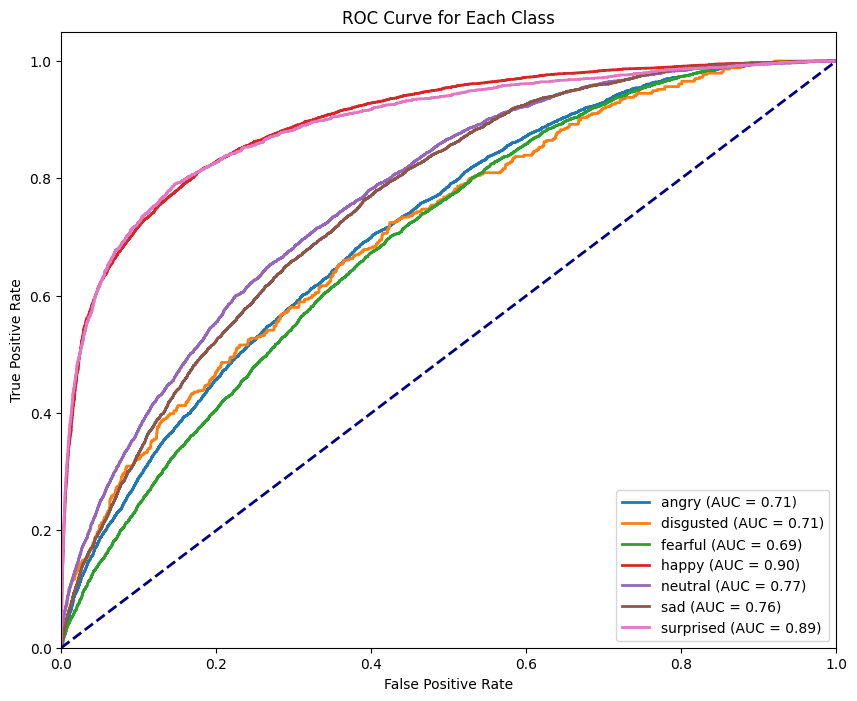

Epoch 2/10, Train Loss: 1.1603, Test Loss: 1.3277, Test Accuracy: 0.5064


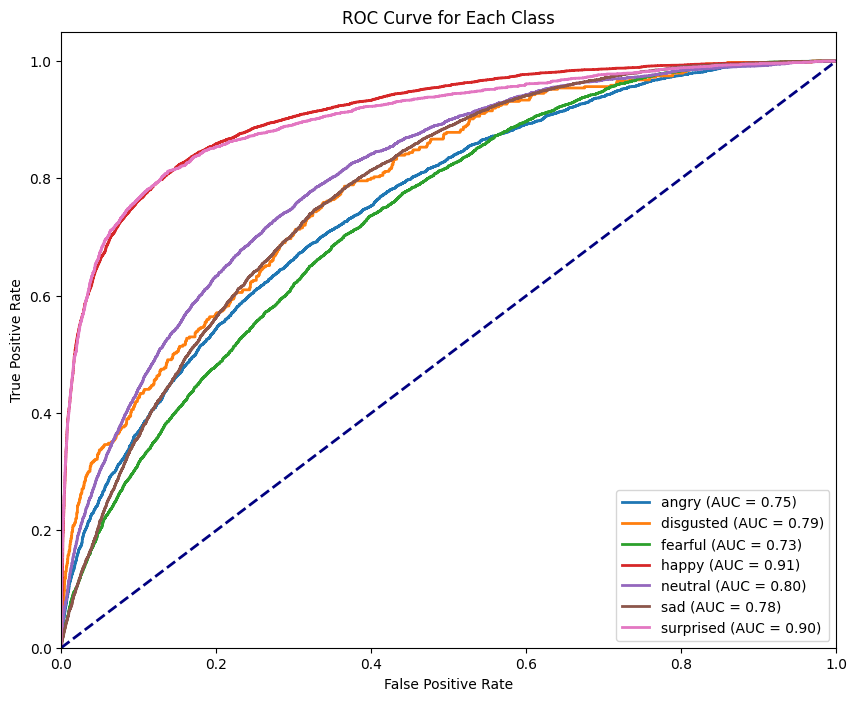

Epoch 3/10, Train Loss: 0.7593, Test Loss: 1.4896, Test Accuracy: 0.4922


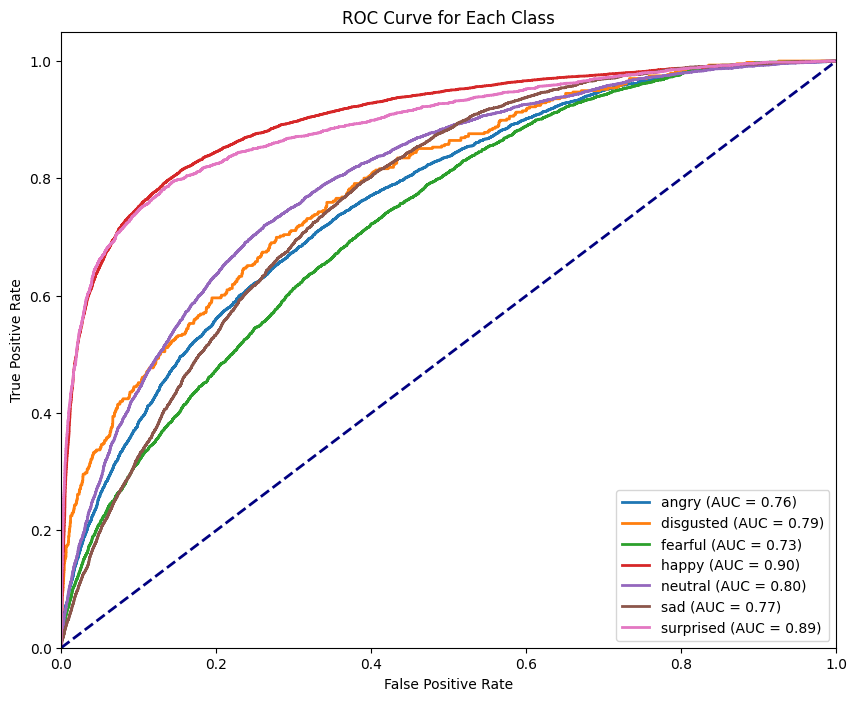

Epoch 4/10, Train Loss: 0.5072, Test Loss: 1.8555, Test Accuracy: 0.5085


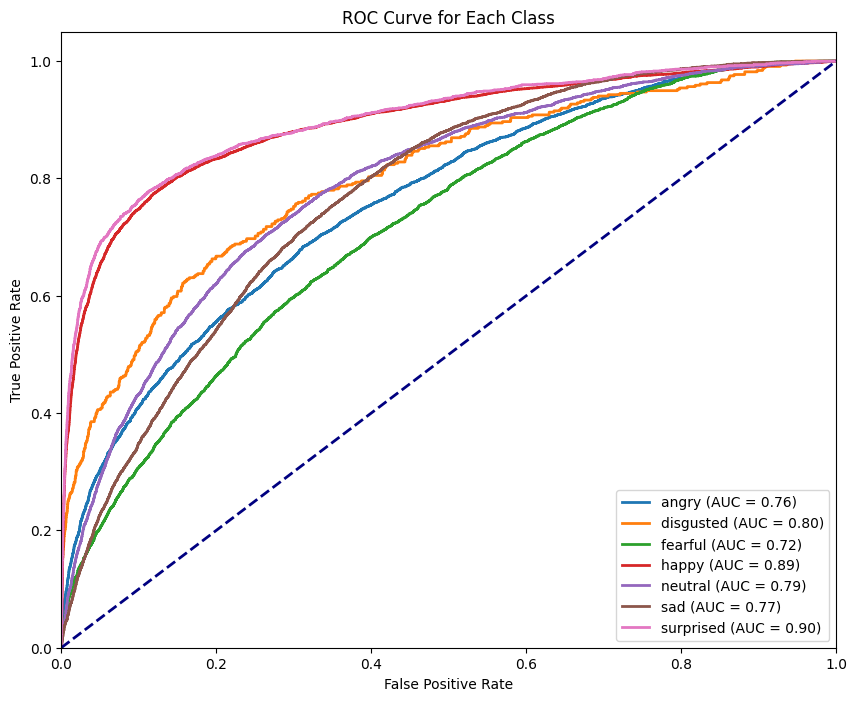

Epoch 5/10, Train Loss: 0.3653, Test Loss: 1.8833, Test Accuracy: 0.5127


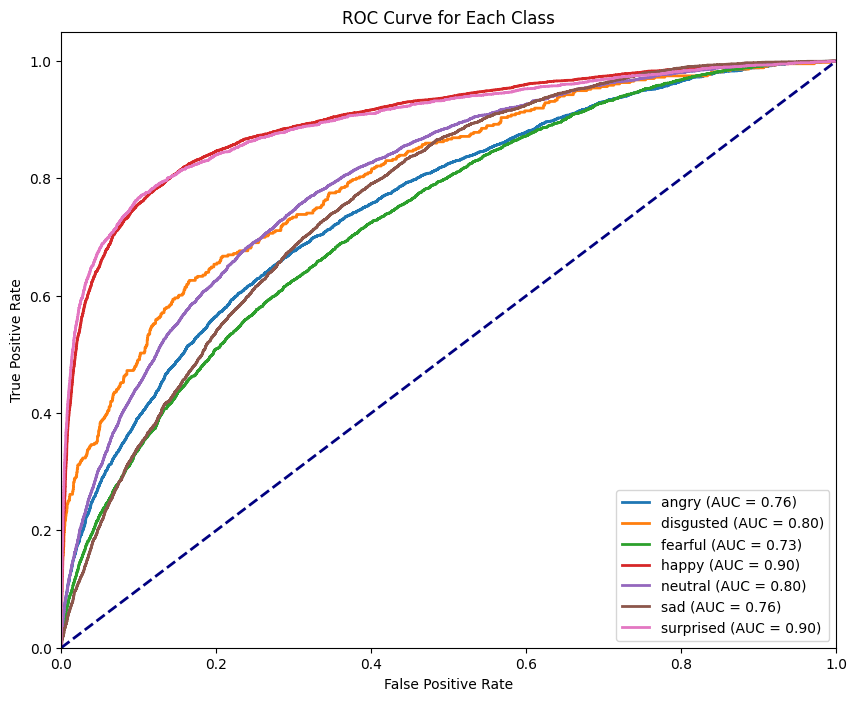

Epoch 6/10, Train Loss: 0.2616, Test Loss: 1.9269, Test Accuracy: 0.5209


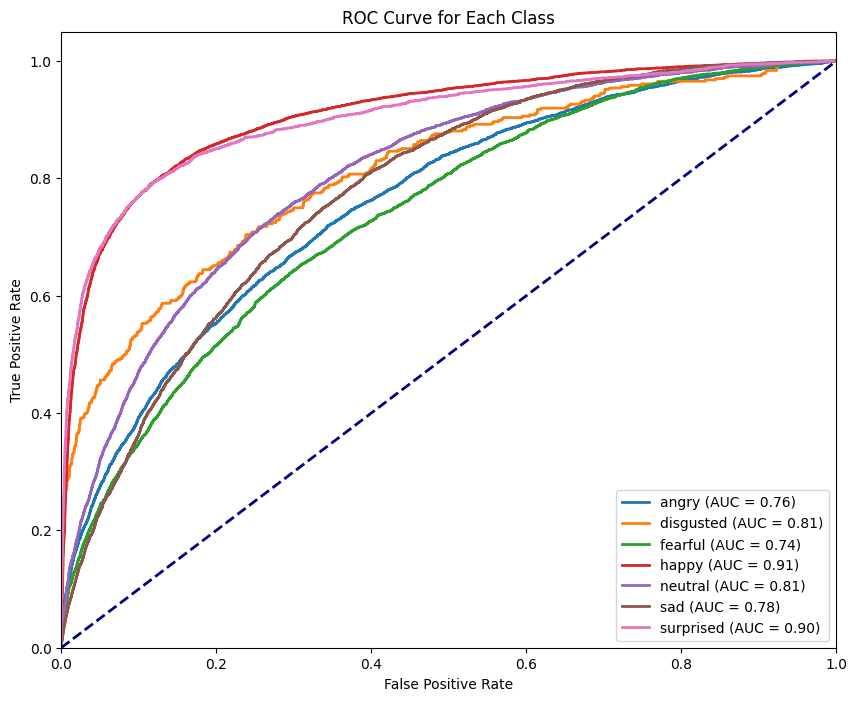

Epoch 7/10, Train Loss: 0.1704, Test Loss: 2.0741, Test Accuracy: 0.5295


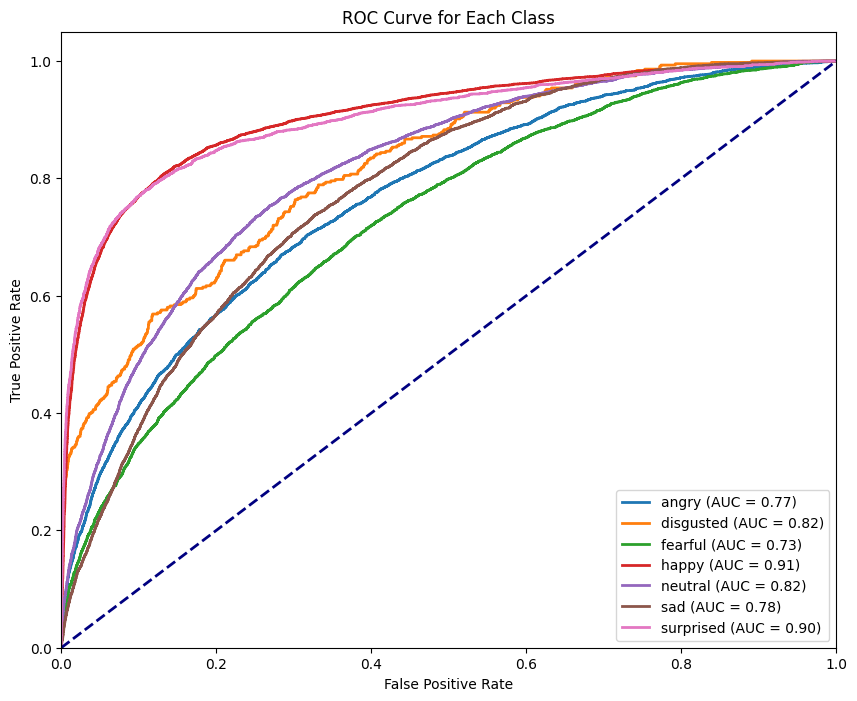

Epoch 8/10, Train Loss: 0.1630, Test Loss: 2.1050, Test Accuracy: 0.5265


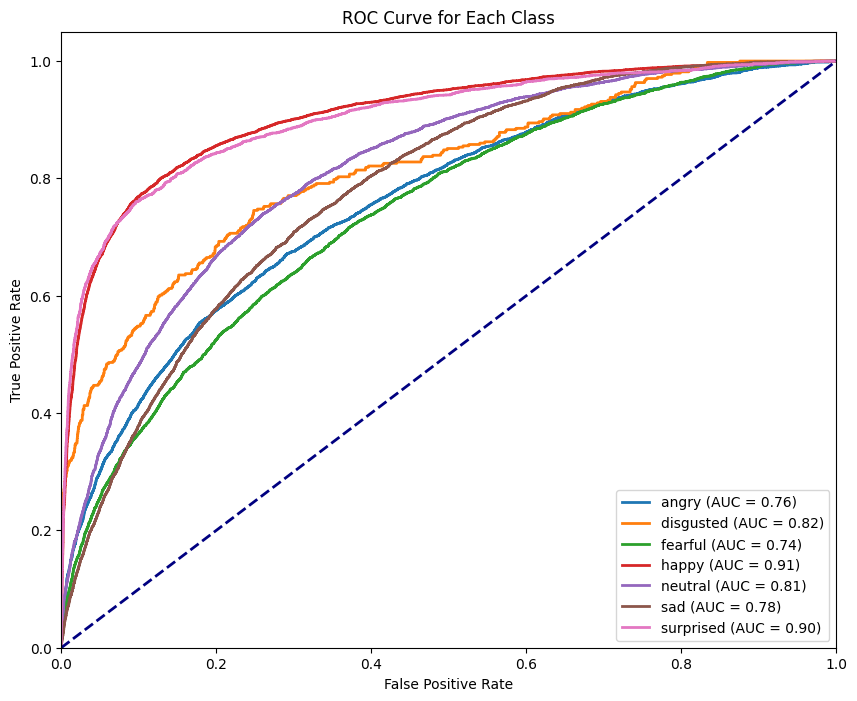

Epoch 9/10, Train Loss: 0.2054, Test Loss: 2.0941, Test Accuracy: 0.5246


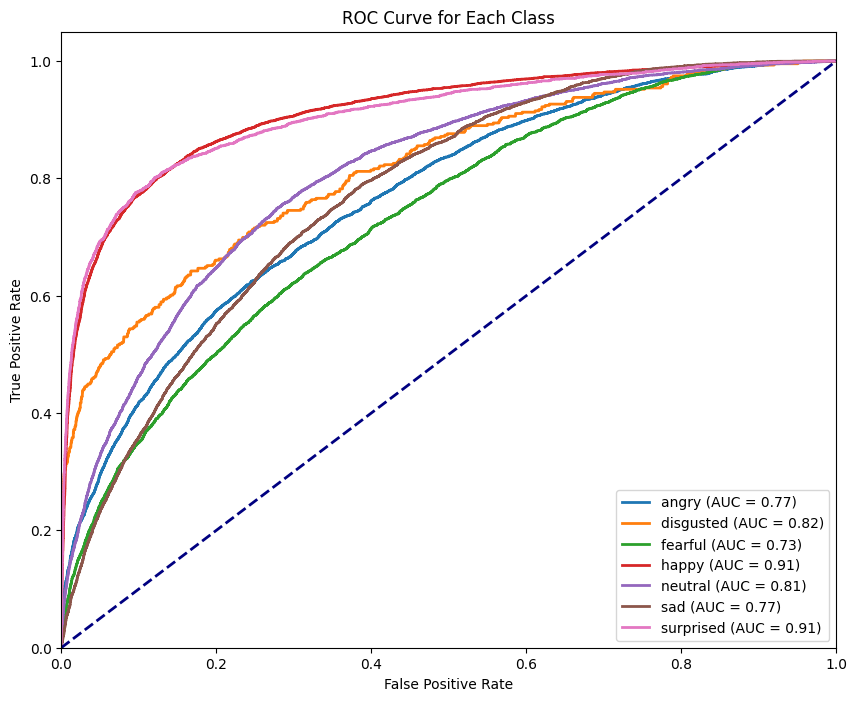

Epoch 10/10, Train Loss: 0.1326, Test Loss: 2.1323, Test Accuracy: 0.5244


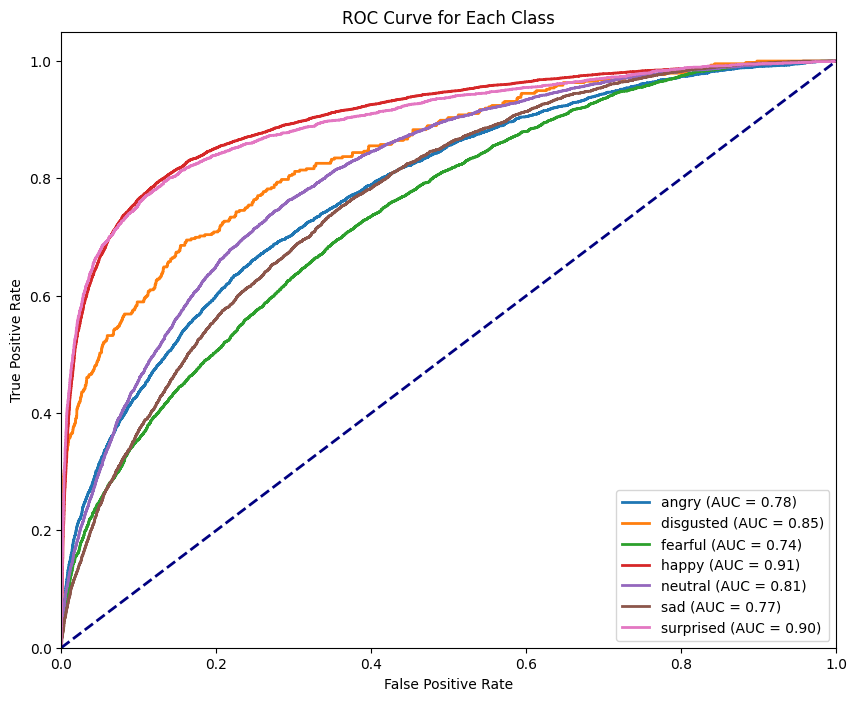

In [43]:
# Supón que tienes train_loader, test_loader, model, optimizer, criterion, device y epochs ya definidos
train_model(train_loader, test_loader, model, optimizer, criterion, device, epochs, CLASS_LABELS)


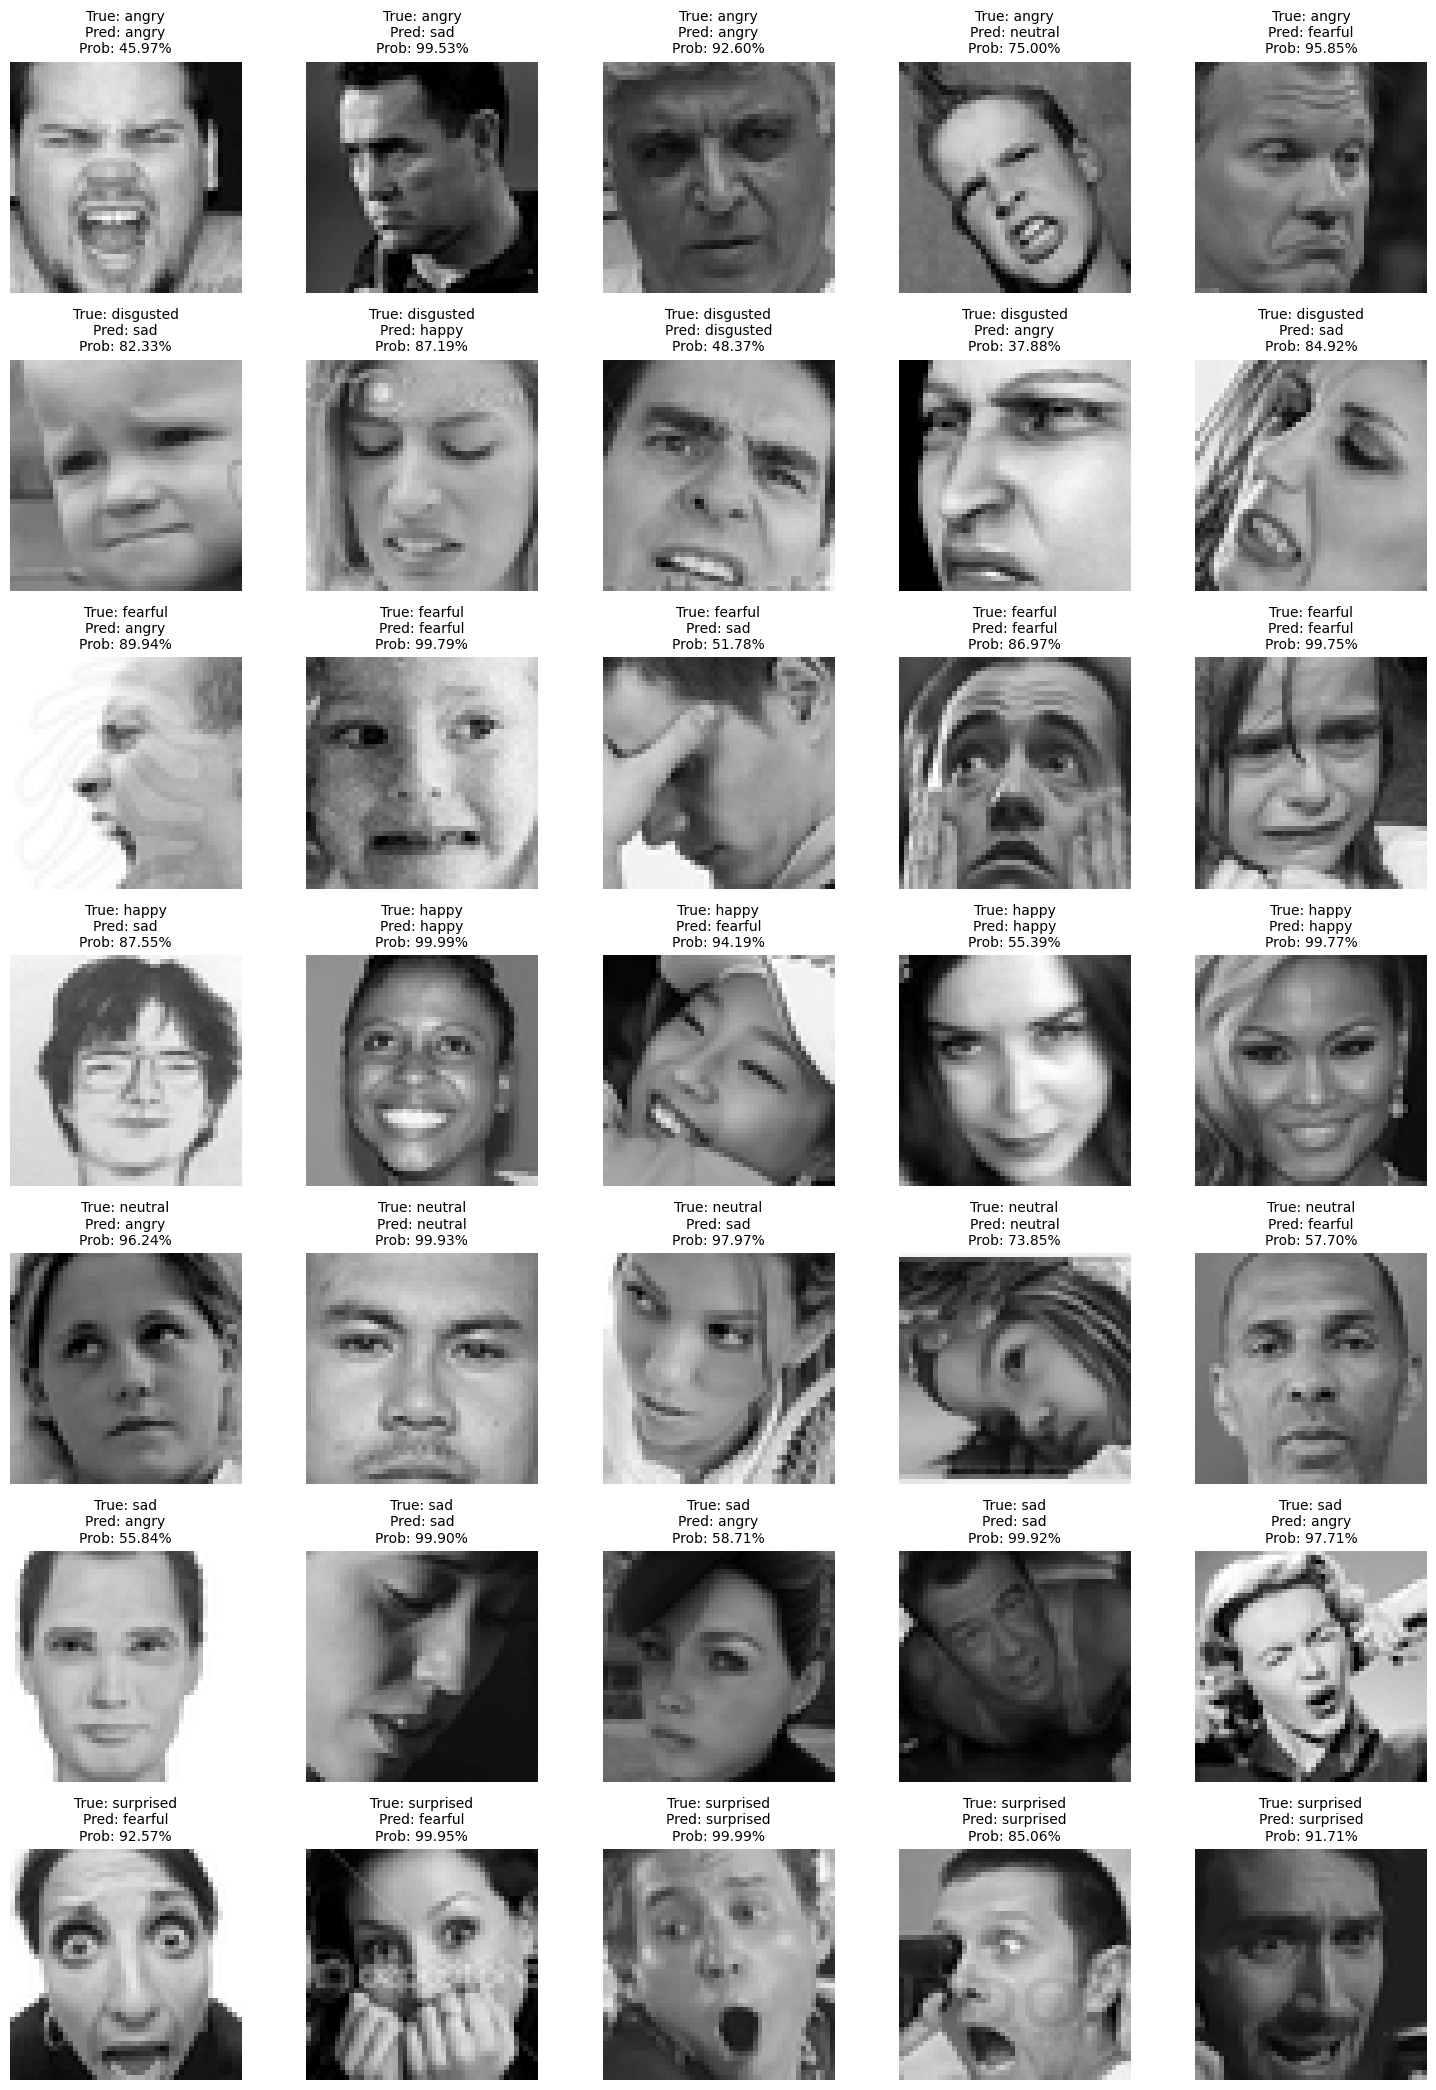

In [44]:
# Función para mostrar predicciones en el conjunto de pruebas
def show_random_test_predictions(model, test_loader, device, class_labels, images_per_class=5):
    model.eval()
    images, labels, preds, pred_probs = [], [], [], []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            probabilities = torch.nn.functional.softmax(output, dim=1)  # Calcular las probabilidades
            pred = output.argmax(dim=1, keepdim=True)
            images.append(data.cpu().numpy())
            labels.append(target.cpu().numpy())
            preds.append(pred.cpu().numpy())
            pred_probs.append(probabilities.cpu().numpy())

    images = np.concatenate(images)
    labels = np.concatenate(labels)
    preds = np.concatenate(preds)
    pred_probs = np.concatenate(pred_probs)

    num_classes = len(class_labels)
    plt.figure(figsize=(images_per_class * 3, num_classes * 3))  # Ajustar el tamaño de la figura

    for class_index, class_name in enumerate(class_labels):
        class_indices = np.where(labels == class_index)[0]  # Obtener índices de la clase actual
        sample_indices = random.sample(list(class_indices), min(images_per_class, len(class_indices)))  # Elegir imágenes al azar
        
        for i, idx in enumerate(sample_indices):
            plt.subplot(num_classes, images_per_class, class_index * images_per_class + i + 1)
            img = np.transpose(images[idx], (1, 2, 0))
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Deshacer la normalización
            img = np.clip(img, 0, 1)  # Asegurarse de que los valores de los píxeles estén en el rango [0, 1]
            plt.imshow(img)
            pred_prob = pred_probs[idx][preds[idx][0]] * 100  # Obtener el porcentaje de probabilidad de la predicción
            plt.title(f'True: {class_labels[labels[idx]]}\nPred: {class_labels[preds[idx][0]]}\nProb: {pred_prob:.2f}%', fontsize=10)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar algunas predicciones en el conjunto de pruebas
show_random_test_predictions(model, test_loader, device, CLASS_LABELS, images_per_class=5)


## Conclusiones

- AUC Score: El AUC es una métrica importante ya que representa la capacidad del modelo para diferenciar correctamente entre las clases. Un AUC más cercano a 1 indica un mejor rendimiento.
- Curvas ROC: Las curvas ROC permiten visualizar el trade-off entre la tasa de verdaderos positivos (True Positive Rate) y la tasa de falsos positivos (False Positive Rate).

### Resultados por Emoción:

- Emociones con Alto AUC: Emociones como happy y surprised pueden tener AUC más altos, indicando que el modelo tiene un buen rendimiento al detectar estas emociones. El modelo mostró un rendimiento excelente en la detección de la emoción happy y surprised con un AUC de 0.90.

- Emociones con Bajo AUC: Si hay emociones con AUC más bajos como angry o fearful, esto indica que el modelo tiene más dificultades para diferenciar estas emociones de otras. Esto puede deberse a la similitud en las características faciales o a un desequilibrio en el conjunto de datos.

- En general, el modelo ha demostrado ser eficaz en la detección de emociones faciales, con varias emociones mostrando altos valores de AUC. Esto sugiere que el modelo puede ser una herramienta útil en aplicaciones de análisis de satisfacción del cliente basadas en reacciones faciales.

### Aplicaciones Futuras: ###

- Este análisis proporciona una base sólida para el uso del modelo en aplicaciones prácticas. Las mejoras adicionales pueden incluir la recolección de más datos equilibrados, la utilización de técnicas de data augmentation, y la exploración de arquitecturas de modelo más avanzadas.